In [1]:
# This example demonstrates the creation of a Bell state with noise using qstack.
# A Bell state is a maximally entangled quantum state of two qubits.
# This example also introduces a noise model to simulate realistic quantum systems.
# The Toy layer is a simplified abstraction layer for quantum operations, useful for prototyping and testing.
# It uses gates with names that reflect the intention (e.g., Flip) instead of the mathematical operation (e.g., X).
# It provides basic quantum gates and operations to define quantum programs.
from qstack.layers.toy import *
from qstack import Program, Stack, Kernel

# Create a stack using the toy layer.
stack = Stack.create(layer)

# Define a quantum program that allocates two qubits and entangles them.
program = Program(
    stack=stack,
    kernels=[
        Kernel.allocate(
            "q1",  # First qubit
            "q2",  # Second qubit
            compute=[
                Mix("q1"),  # Apply a mixing operation to the first qubit.
                Entangle("q1", "q2"),  # Entangle the first and second qubits.
            ],
        )
    ],
)

# Print the program to visualize its structure.
print(program)


@stack: toy

allocate q1 q2:
  mix q1
  entangle q1 q2
measure


In [2]:
# Set up a local quantum machine to execute the program.
from qstack.machine import local_machine_for, QuantumMachine
from qstack.emulator import from_stack

# Each machine in qstack is created to target a specific stack or instruction set.
# This ensures that the machine can correctly interpret and execute the program's instructions.

# Create a quantum machine with a noiseless emulator.
machine = QuantumMachine(qpu=from_stack(stack), cpu=local_machine_for(stack).cpu)


In [3]:
# A single-shot execution runs the program once and returns the measurement outcomes.
# This is useful for observing the result of a single execution of the quantum program.
machine.single_shot(program)


(1, 1)

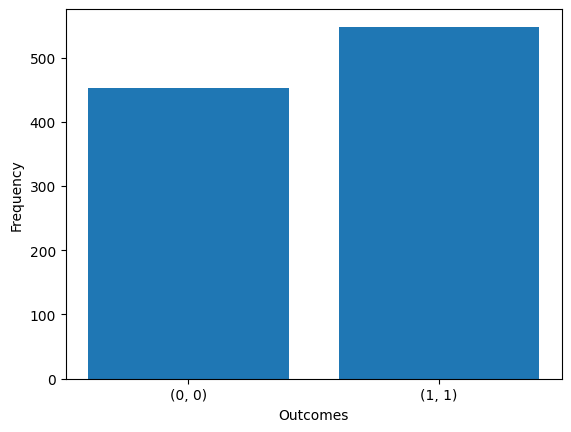

In [4]:
# Evaluate the program multiple times and plot the resulting histogram.
machine.eval(program).plot_histogram()


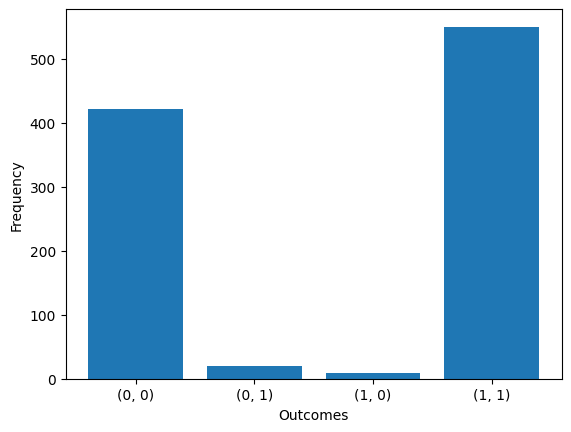

In [5]:
# Introduce a noise model to simulate realistic quantum systems.
# Here, we use a depolarizing noise channel with an error probability of 0.2.
from qstack.noise import DepolarizingNoise

noise_channel = DepolarizingNoise(error_probability=0.2)

# Create a quantum machine with the noisy emulator.
machine = QuantumMachine(qpu=from_stack(stack, noise=noise_channel), cpu=local_machine_for(stack).cpu)

# Evaluate the program with noise and plot the resulting histogram.
machine.eval(program).plot_histogram()
